In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from matplotlib import pyplot as plt

Next we want to create the dataset using make_moons.
We use 1000 samples - with some noise - and we set a seed.

In [2]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

Next we create a test and a temp dataset. 
We split the temp dataset in two - for validation and test.
So first we train our model, then we tune it on the validation set and finally - we test it.
The y variables are the labels.

In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(800, 2) (100, 2) (100, 2) (800,) (100,) (100,)


Lets see, how the "moons" looks like.
We use plt to create a figure.
We use the x and y coordinates of X.
c=y = ensures to color the two labels.
s=5 is the size of the datapoints.

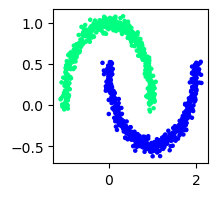

In [85]:
plt.figure(figsize=(2,2))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap("winter_r"),s=5)
plt.show()

Lets start out with a linear kernel. Using a linear kernel we try to split the data in two pieces with a straight line in 2d space. 
Look at the picture and think of, where that would be. An accurency of about 80 pct. should be possible.
We start by training on the training data, and then we can tune the model with the validation dataset before testing.

Tuning the model we can change our budget - C:

When C is small:

Emphasizes a wider margin.
Allows misclassifications (datapoints might end up within the margin or even on the wrong side of the decision boundary).
Can result in a simpler decision boundary which might be more generalizable to unseen data.
Result: much bias, less variance.

When C is large:

Emphasizes correctly classifying all training examples, even if it means choosing a smaller-margin hyperplane.
Can lead to overfitting, especially if the data isn't linearly separable. The model might try too hard to fit the noise or outliers in the training data.
The decision boundary can become more complex.
Result: less bias, much variance.

We can use CV to find the budget - C.

In this case I just changed C multiple times and a quite small budget seems to be the better choice. 

Finally we can test our model - typically ONLY once - on the test dataset.

In [5]:
svm_linear = svm.SVC(kernel='linear', C=2) 
svm_linear.fit(X_train, y_train)
y_val_hat_linear = svm_linear.predict(X_val)
accuracy_val_linear = accuracy_score(y_val_hat_linear, y_val)
print(f'Linear SVM achieved {round(accuracy_val_linear * 100, 1)}% validation accuracy.')

Linear SVM achieved 91.0% validation accuracy.


In [6]:
y_test_hat_linear = svm_linear.predict(X_test)
accuracy_test_linear = accuracy_score(y_test_hat_linear, y_test)
print(f'Linear SVM achieved {round(accuracy_test_linear * 100, 1)}% test accuracy.')

Linear SVM achieved 87.0% test accuracy.


We did quite a good job thinking of the use of a linear kernel. Lets try using polynomials.
Then we use the kernel to change the dimention of the data for us to split the data linear.
For the intuition one can think that we lift up the datapoints to another dimention, and thereby we can seperate the classes in 3d space. 
Here we can tune the model by changing the degrees - with higher degrees we might overfit.

Therefore we have now two tuning parameters - C and degrees - again we could use CV to choose the values of the tuning parameters.

C does not seems to have an effect here, and 3 degrees seems to be the better option.

Notice that we should be careful not overfitting - thinking of the bias-variance trade-off.

Can we tune the model too much? Always choose the simpler model...

In [7]:
svm_poly = svm.SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train, y_train)
y_test_hat_poly = svm_poly.predict(X_val)
accuracy_poly = accuracy_score(y_test_hat_poly, y_val)
print(f'Polynomial SVM achieved {round(accuracy_poly * 100, 1)}% accuracy.')

Polynomial SVM achieved 96.0% accuracy.


In [8]:
y_test_hat_poly = svm_poly.predict(X_test)
accuracy_test_poly = accuracy_score(y_test_hat_poly, y_test)
print(f'Poly SVM achieved {round(accuracy_test_poly * 100, 1)}% test accuracy.')

Poly SVM achieved 88.0% test accuracy.


Lets finish of with Radial Basis Function (RBF) Kernel - this is like projecting the data into an infinite-dimensional space.

In [9]:
svm_rbf = svm.SVC(kernel='rbf', C=1)
svm_rbf.fit(X_train, y_train)
y_test_hat_rbf = svm_rbf.predict(X_val)
accuracy_rbf = accuracy_score(y_test_hat_rbf, y_val)
print(f'RBF SVM achieved {round(accuracy_rbf * 100, 1)}% accuracy.')

RBF SVM achieved 100.0% accuracy.


In [10]:
y_test_hat_rbf = svm_rbf.predict(X_test)
accuracy_test_rbf = accuracy_score(y_test_hat_rbf, y_test)
print(f'rbf SVM achieved {round(accuracy_test_rbf * 100, 1)}% test accuracy.')

rbf SVM achieved 100.0% test accuracy.


Lets vizualize the actual data and how well our models performed!

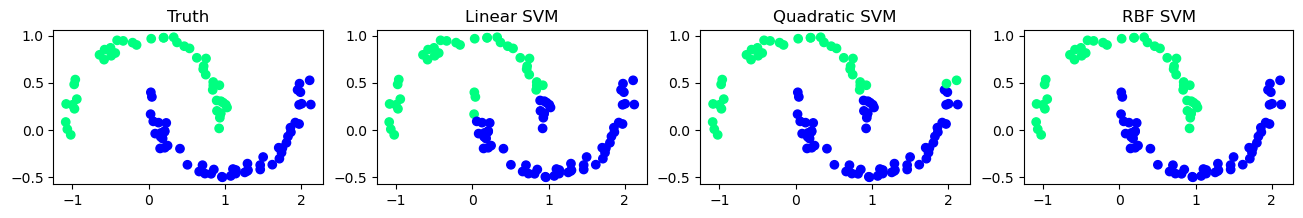

In [11]:
fig = plt.figure(figsize=plt.figaspect(0.1))
ax = fig.add_subplot(1, 4, 1)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
           cmap=plt.get_cmap("winter_r"))
plt.title('Truth')

ax = fig.add_subplot(1, 4, 2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat_linear, 
           cmap=plt.get_cmap("winter_r"))
plt.title('Linear SVM')

ax = fig.add_subplot(1, 4, 3)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat_poly, 
           cmap=plt.get_cmap("winter_r"))
plt.title('Quadratic SVM')

ax = fig.add_subplot(1, 4, 4)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat_rbf, 
           cmap=plt.get_cmap("winter_r"))
plt.title('RBF SVM')

plt.show()

So when using SVM we have in total 3 primary tuning parmeters:

1. The budget C
2. Degrees
3. Kernel function

